Index(['objectid', 'name', 'alt_name', 'abrv_name', 'name_ucase', 'name_lcase',
       'fips', 'cnty_fips', 'cntyfips_n', 'alpha0', 'alpha0_n', 'alpha1',
       'alpha1_n', 'dhs_dis', 'dhs_dis_n', 'latitude', 'longitude', 'col_q',
       'shape_Leng', 'shape_Area', 'geometry'],
      dtype='object')


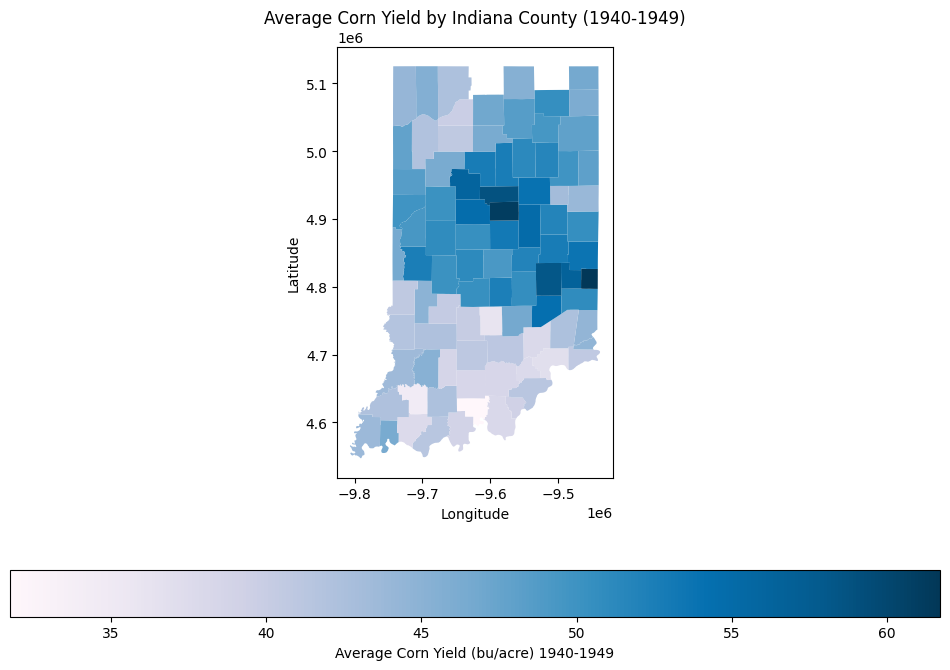

Index(['objectid', 'name', 'alt_name', 'abrv_name', 'name_ucase', 'name_lcase',
       'fips', 'cnty_fips', 'cntyfips_n', 'alpha0', 'alpha0_n', 'alpha1',
       'alpha1_n', 'dhs_dis', 'dhs_dis_n', 'latitude', 'longitude', 'col_q',
       'shape_Leng', 'shape_Area', 'geometry'],
      dtype='object')


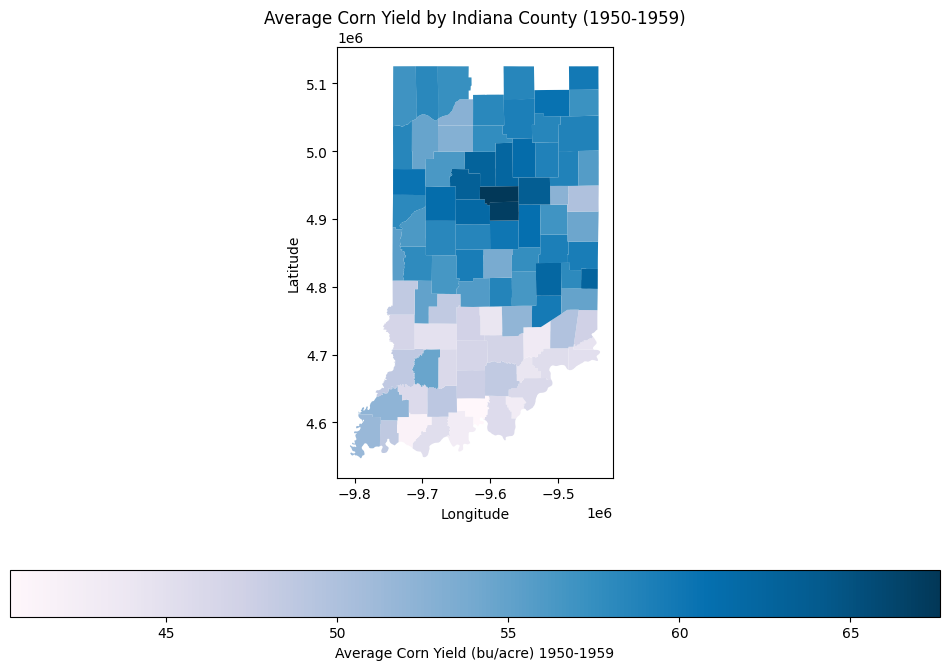

Index(['objectid', 'name', 'alt_name', 'abrv_name', 'name_ucase', 'name_lcase',
       'fips', 'cnty_fips', 'cntyfips_n', 'alpha0', 'alpha0_n', 'alpha1',
       'alpha1_n', 'dhs_dis', 'dhs_dis_n', 'latitude', 'longitude', 'col_q',
       'shape_Leng', 'shape_Area', 'geometry'],
      dtype='object')


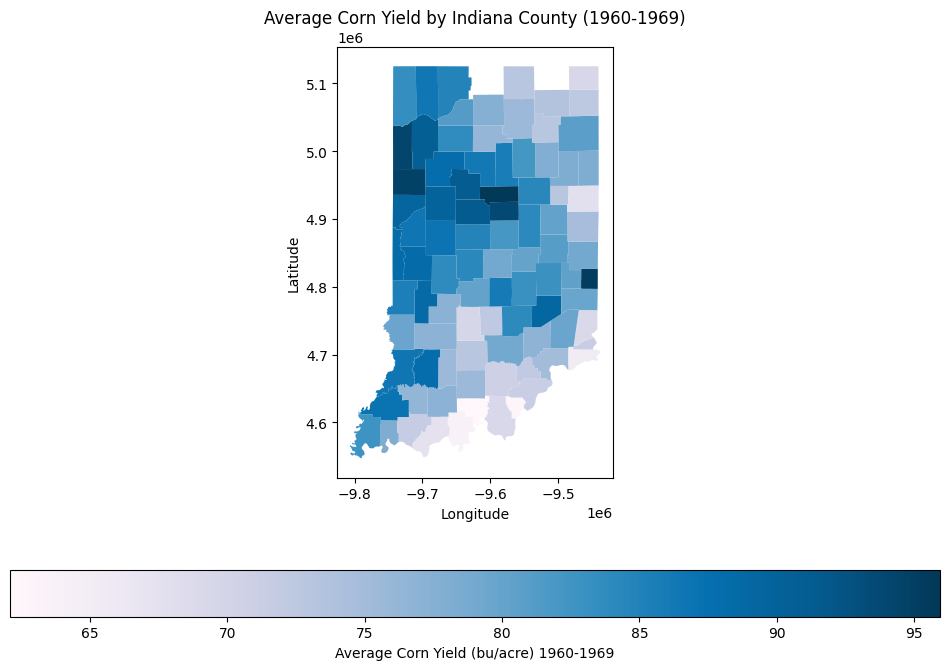

Index(['objectid', 'name', 'alt_name', 'abrv_name', 'name_ucase', 'name_lcase',
       'fips', 'cnty_fips', 'cntyfips_n', 'alpha0', 'alpha0_n', 'alpha1',
       'alpha1_n', 'dhs_dis', 'dhs_dis_n', 'latitude', 'longitude', 'col_q',
       'shape_Leng', 'shape_Area', 'geometry'],
      dtype='object')


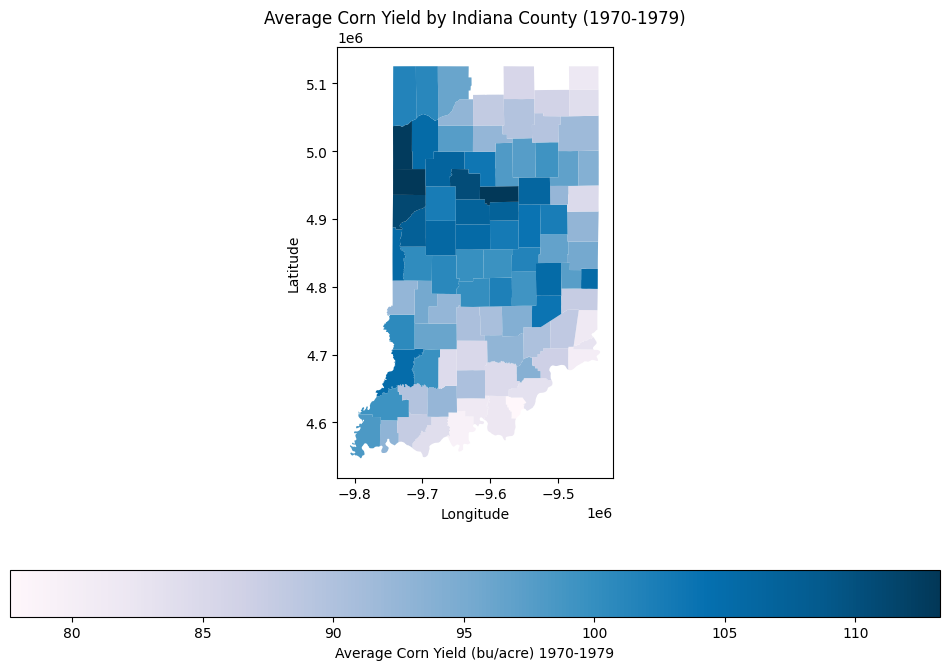

Index(['objectid', 'name', 'alt_name', 'abrv_name', 'name_ucase', 'name_lcase',
       'fips', 'cnty_fips', 'cntyfips_n', 'alpha0', 'alpha0_n', 'alpha1',
       'alpha1_n', 'dhs_dis', 'dhs_dis_n', 'latitude', 'longitude', 'col_q',
       'shape_Leng', 'shape_Area', 'geometry'],
      dtype='object')


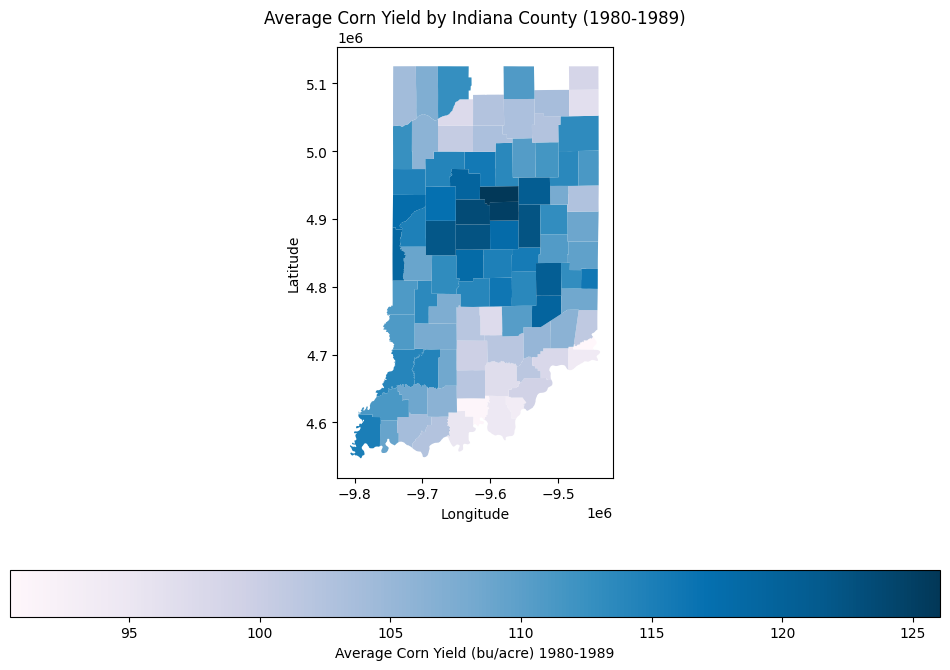

Index(['objectid', 'name', 'alt_name', 'abrv_name', 'name_ucase', 'name_lcase',
       'fips', 'cnty_fips', 'cntyfips_n', 'alpha0', 'alpha0_n', 'alpha1',
       'alpha1_n', 'dhs_dis', 'dhs_dis_n', 'latitude', 'longitude', 'col_q',
       'shape_Leng', 'shape_Area', 'geometry'],
      dtype='object')


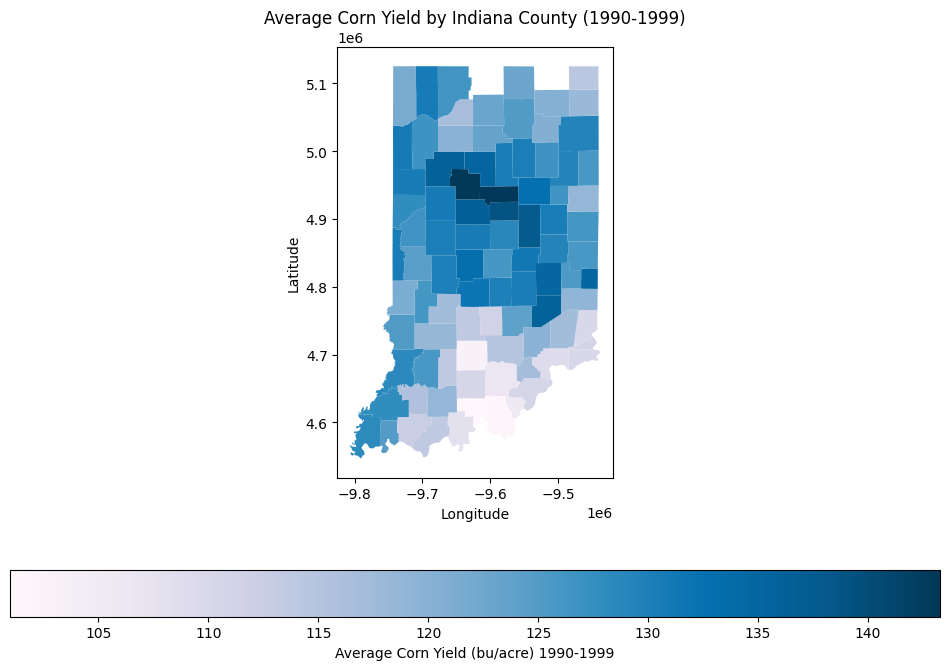

Index(['objectid', 'name', 'alt_name', 'abrv_name', 'name_ucase', 'name_lcase',
       'fips', 'cnty_fips', 'cntyfips_n', 'alpha0', 'alpha0_n', 'alpha1',
       'alpha1_n', 'dhs_dis', 'dhs_dis_n', 'latitude', 'longitude', 'col_q',
       'shape_Leng', 'shape_Area', 'geometry'],
      dtype='object')


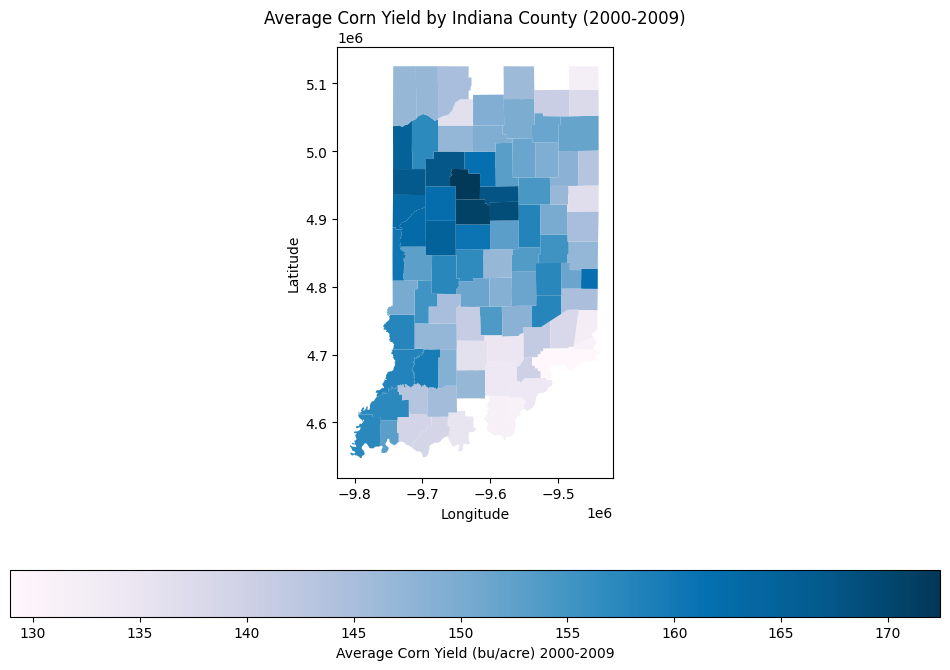

Index(['objectid', 'name', 'alt_name', 'abrv_name', 'name_ucase', 'name_lcase',
       'fips', 'cnty_fips', 'cntyfips_n', 'alpha0', 'alpha0_n', 'alpha1',
       'alpha1_n', 'dhs_dis', 'dhs_dis_n', 'latitude', 'longitude', 'col_q',
       'shape_Leng', 'shape_Area', 'geometry'],
      dtype='object')


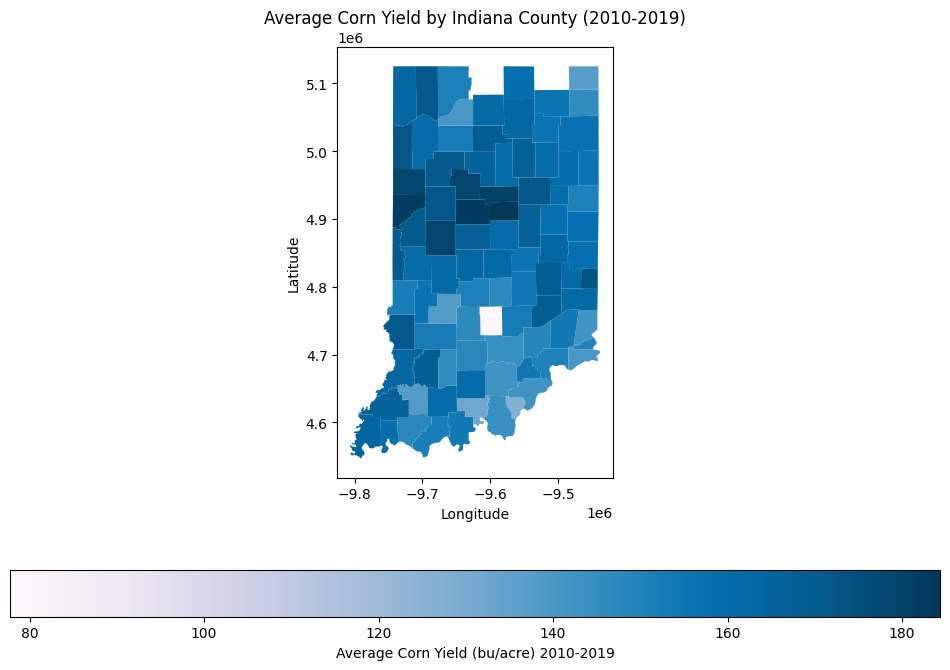

Index(['objectid', 'name', 'alt_name', 'abrv_name', 'name_ucase', 'name_lcase',
       'fips', 'cnty_fips', 'cntyfips_n', 'alpha0', 'alpha0_n', 'alpha1',
       'alpha1_n', 'dhs_dis', 'dhs_dis_n', 'latitude', 'longitude', 'col_q',
       'shape_Leng', 'shape_Area', 'geometry'],
      dtype='object')


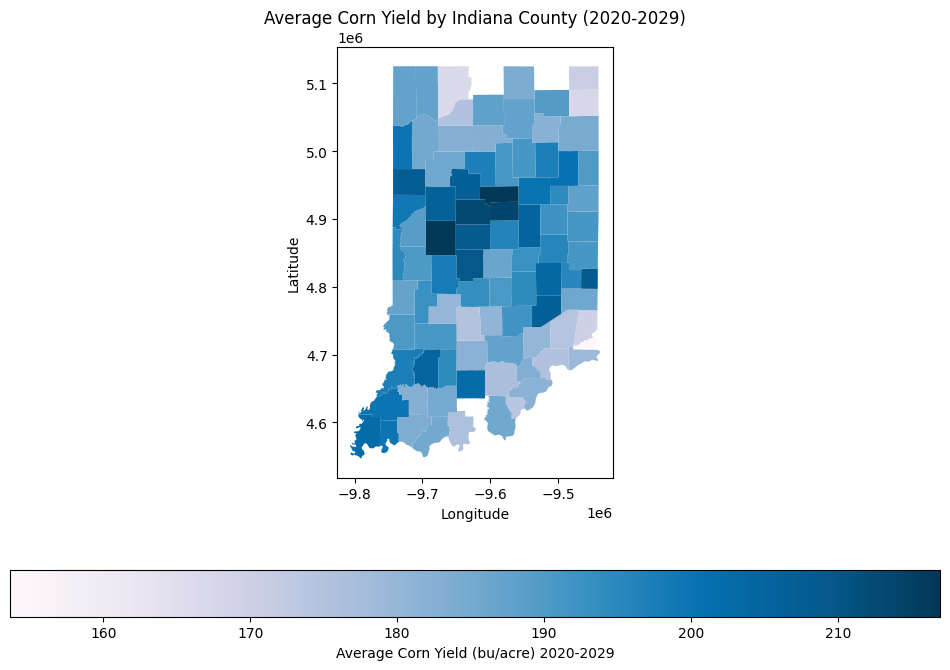

In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the county-level corn yield dataset (assuming your dataset has county-level information)
cornCounty = pd.read_csv("Corn Yield by County.csv")
cornCounty = cornCounty[(cornCounty['Period'] == 'YEAR') & (cornCounty['Year'] >= 1940)]
cornCounty = cornCounty[['Value', 'Year', 'County', 'State']]
cornCounty['County'] = cornCounty['County'].str.title()

# Filter for only Indiana counties
cornCounty = cornCounty[cornCounty['State'] == 'INDIANA']

# Load the shapefile of Indiana counties
indiana_map = gpd.read_file('indianamap/County_Boundaries_of_Indiana_Current.shp')

# Create a list of decades to iterate over
decades = range(1940, 2025, 10)

# Create maps for each decade
for start_year in decades:
    end_year = start_year + 9  # Define the end year for the decade
    
    # Filter corn yield data for the current decade and calculate the average for each county
    corn_decade = cornCounty[(cornCounty['Year'] >= start_year) & (cornCounty['Year'] <= end_year)]
    corn_decade_avg = corn_decade.groupby('County', as_index=False)['Value'].mean()
    # Merge the GeoDataFrame with the average corn yield data
    merged = indiana_map.set_index('name').join(corn_decade_avg.set_index('County'), how='left')

    # Create the yield map
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    merged.plot(column='Value', ax=ax, legend=True,
                legend_kwds={'label': f"Average Corn Yield (bu/acre) {start_year}-{end_year}",
                             'orientation': "horizontal"},
                cmap='PuBu')  # Choose a colormap for the fill colors

    # Title and labels
    plt.title(f'Average Corn Yield by Indiana County ({start_year}-{end_year})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

cornCounty = pd.read_csv("Corn Yield by County.csv")
cornCounty = cornCounty[(cornCounty['Period'] == 'YEAR') & (cornCounty['Year'] >= 1940)]
cornCounty = cornCounty[['Value', 'Year', 'County', 'State']]
cornCounty['County'] = cornCounty['County'].str.title()
cornCounty = cornCounty[cornCounty['State'] == 'WYOMING']

wyoming_map = gpd.read_file('wyomingmaps/County_Boundaries_24K.shp')

decades = range(1940, 2025, 10)

for start_year in decades:
    end_year = start_year + 9
    corn_decade = cornCounty[(cornCounty['Year'] >= start_year) & (cornCounty['Year'] <= end_year)]
    corn_decade_avg = corn_decade.groupby('County', as_index=False)['Value'].mean()
    print(wyoming_map)
    merged = wyoming_map.set_index('COUNTY_NAM').join(corn_decade_avg.set_index('County'), how='left')

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    merged.plot(column='Value', ax=ax, legend=True,
                legend_kwds={'label': f"Average Corn Yield (bu/acre) {start_year}-{end_year}",
                             'orientation': "horizontal"},
                cmap='PuBu')

    plt.title(f'Average Corn Yield by Wyoming County ({start_year}-{end_year})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


    OBJECTID            DNR_REGION  DNR_CNTY_C COUNTY_NAM COUNTY_FIP  \
0        961      Southeast Region          30    Kenosha         59   
1        962  South Central Region          33  Lafayette         65   
2        963  South Central Region          54       Rock        105   
3        964      Southeast Region          65   Walworth        127   
4        965  South Central Region          23      Green         45   
..       ...                   ...         ...        ...        ...   
67      1028       Northern Region          26       Iron         51   
68      1029       Northern Region          16    Douglas         31   
69      1030       Northern Region           4   Bayfield          7   
70      1031       Northern Region           2    Ashland          3   
71      1032      Northeast Region           5      Brown          9   

       SHAPEAREA       SHAPELEN  \
0   7.210454e+08  123267.303358   
1   1.641795e+09  164707.649840   
2   1.879382e+09  174114.58774

KeyError: "None of ['GEOID'] are in the columns"